<img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png" style="margin: 0 auto"/>

<h1 style="text-align:center;color: darkblue">Sistema de Regresión para predicción del PIB en Ecuador</h1>

<ul style="text-align:center;list-style:none">
    <li><strong>Autor: </strong> Bryam David Vega Moreno</li>
    <li><strong>Maestro: </strong> Diego Quisi</li>
    <li><strong>Materia: </strong> Simulación</li>
    <li><strong>Universidad: </strong> Universidad Politécnica Salesiana</li>
    <li><strong>Carrera: </strong> Ciencias de la computación</li>
</ul>

--------------------

<h2 style="color:yellowgreen">Introducción</h2>

El Producto Interno Bruto **(PIB)** es una medida que permite ver la actividad económica de un país. Básicamente calcula cual fue la producción en bienes y servicios que se hizo en un periodo de tiempo específico, generalmente en un trimestre o en un año, en las fronteras de un país.  Entre otras palabras el PIB nos permite visualizar como va la economía de un País. Por ejemplo: Si comparamos el PIB de Ecuador contra Venezuela nos daremos cuenta que la economía Ecuatoriana es mejor y más estable que la Venezolana.


En el presente trabajo presentamos un pequeño sistema de predicción del **PIB** tomando como referencia los datos del <a href="https://datos.bancomundial.org/">Banco Mundial</a>. Estos datos nos van a permitir obtener una predicción de como se comportara dicho valor en nuestro País. Sin embargo debemos tomar en cuenta que el calculo del **PIB** dependera de otros factores,los cuales iremos explicando a lo largo de este trabajo.

--------------------------

<h2 style="color:yellowgreen">Librerias a importar</h2>

Para este pequeño sistema haremos uso de diferentes librerias que nos permitiran hacer análisis y crear nuestros modelos de predicción

**Librerias para analisis de datos**

In [1]:
import pandas as pd
import numpy as np

**Librerias para graficos**

In [2]:
import altair as alt
import seaborn as sns

**Librerias para las predicciones**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

**Librerias para las métricas**

In [4]:
from sklearn.metrics import mean_squared_error

**Mejorar visualización de datos**

In [5]:
pd.options.display.float_format='{:,.2f}'.format
import warnings
warnings.simplefilter("ignore")

----------------------------------

<h2 style="color:yellowgreen">Lectura de Datos</h2>

Como habiamos dicho en la introducción, obtuvimos los datos del banco mundial, en esta ocasión tenemos los datos del PIB del Ecuador desde el año de 1960 hasta el 2019. A continuación mostramos los datos obtenidos

In [6]:
df  = pd.read_csv('./in/pib.csv',sep=';')

In [7]:
df = df[df['Country/Region']=='Ecuador']
df = pd.DataFrame(df.iloc[0].loc['1960':])

In [8]:
df.head()

,64
1960,"1723727707,50"
1961,"1606925598,76"
1962,"1517480482,39"
1963,"1823470009,69"
1964,"2243071157,20"


Como podemos notar, el conjunto de datos inicia esde 1960 como se había explicado anteriormente, sin embargo, vemos que los datos estan sucios, como por ejemplo las cebeceras de las columnas, los valores del pib estan con coma, lo cual hace que dicho valor sea tomado como un str más no como un tipo de dato numérico, por lo cual procederemos a realizar un proceso rápido de transformación

----------------------------

<h2 style="color:yellowgreen">Proceso de transformación</h2>

Procedemos a resetear los index con la finalidad de que el año forme parte de una columna y una vez hecho eso procedemos a ponerles nombre a las cabeceras con el objetivo de identificar mejor las columnas

In [9]:
df.reset_index(inplace=True)
df.columns = ['year','pib_value']

Por ultimo procedemos a cambiar el tipo de datos tanto para el año a fin de que ambos sean numéricos y tengan el formato correspondiente.Recordemos que os tipos de datos numéricos en python no aceptan coma como separador decimal, por lo que se debe eliminar la coma y reemplzarlo por el punto. Con ello encuenta obtenemos el siguiente resultado.

In [10]:
df['year']= df['year'].astype(np.int64)
df['pib_value'] = df['pib_value'].apply(lambda x : x.replace(',','.')).astype(np.float64)

In [11]:
df.head()

,year,pib_value
0,1960,"1,723,727,707.50"
1,1961,"1,606,925,598.76"
2,1962,"1,517,480,482.39"
3,1963,"1,823,470,009.69"
4,1964,"2,243,071,157.20"


Con los datos procesados, podemos realizar un pequeño análisis de los datos a fin de encontrar insights valiosos y al mismo tiempo, entender el comportamiento de los datos.

------------------------------

<h2 style="color:yellowgreen">Análisis Exploratorio</h2>

 <h4 style="color:orange">Comportamiento del PIB a lo largo del tiempo</h4>

In [12]:
alt.Chart(df.melt('year')).mark_line().encode(
    x='year',
    y=alt.Y('value',title='PIB value $'),
    color='variable'
).properties(title='PIB Ecuador')

alt.Chart(...)

 <h4 style="color:orange">Cambio del PIB a lo largo del tiempo</h4>

In [13]:
df['change']=df['pib_value'].diff()
df['change']=(df['change']/df['pib_value']) *100
df=df.fillna(0)
df.head()

,year,pib_value,change
0,1960,"1,723,727,707.50",0.00
1,1961,"1,606,925,598.76",-7.27
2,1962,"1,517,480,482.39",-5.89
3,1963,"1,823,470,009.69",16.78
4,1964,"2,243,071,157.20",18.71


In [14]:
alt.Chart(df.drop('pib_value',axis=1).melt('year')).mark_line().encode(
    x='year',
    y=alt.Y('value',title='PIB Change %'),
    color='variable'
).properties(title='PIB Ecuador Change')

alt.Chart(...)

 <h4 style="color:orange">PIB mas alto y PIB mas bajo</h4>

In [15]:
print("PIB más alto es :")
pd.DataFrame(df.max()).T

PIB más alto es :


,year,pib_value,change
0,"2,019.00","107,562,008,000.00",41.03


In [16]:
print("PIB más bajo es :")
pd.DataFrame(df.min()).T

PIB más bajo es :


,year,pib_value,change
0,"1,960.00","1,517,480,482.39",-42.44


Como podemos darnos cuenta, esto tiene sentido, puesto que como vimos en la gráfica inicial del PIB, este tiene una tendencia creciente, sin embargo existen momentos en los que decrece el PIB, por lo cual, fijarnos en el valor del PIB para ver el máximo y el mínimo no tiene sentido puesto que el valor del PIB es variable, en este caso, es mejor ver el cambio máximo y el cambio mínimo que se ha dado. Con ello vemos que el cambio más alto es de **41.03%** mientras que el más bajo es de **-42.44%**, ahora tomemos en cuenta que dichos cambios no corresponden a los años que se muetran en als tablas, puesto que ahí se estan mostrando el máximo y mínimo de cada columna, por lo que procederemos a buscar dichos cambios para encontrar el año específico. A continuación mostramos los siguientes resultados:

In [17]:
print("PIB más alto es :")
df[df['change']==pd.DataFrame(df.max()).T['change'][0]]

PIB más alto es :


,year,pib_value,change
14,1974,"6,596,096,000.00",41.03


In [18]:
print("PIB más bajo es :")
df[df['change']==pd.DataFrame(df.min()).T['change'][0]]

PIB más bajo es :


,year,pib_value,change
39,1999,"19,635,450,000.00",-42.44


Con ello podemos notar que la mejor época del PIB en el Ecuador fue en el año **1974** en donde hubo el mejor cambio del dicho valor, mientras que el año **1999** es el peor cambio del PIB en el Ecuador.

 <h4 style="color:orange">PIB negativos vs PIB positivos</h4>

Como habiamos explicado anteriormente, si bien el valor del PIB tiende a ser creciente, este tiene a ser cambiante por diferentes valores, por lo cual su valor no es una médida que nos de mucha información, sin embargo, trabajar con el cambio del PIB, nos aportara una mejor prespectiva de como ha ido cambiando el PIB realmente con respecto al tiempo, de esta manera podemos obtener los siguientes resultados.

In [19]:
dict_n_vs_p = {'positive':df.query('change>0').count()[0],'negative':df.query('change<0').count()[0]}
df_pn = pd.DataFrame(dict_n_vs_p,index=[0]).T
df_pn.reset_index(inplace=True)
df_pn.columns = ['description','value']

In [20]:
alt.Chart(df_pn).mark_bar(size=30).encode(
    x='description',
    y=alt.Y('value',title='count values'),
    color='description'
).properties(width=alt.Step(100),title='Positive vs Negative PIB')

alt.Chart(...)

Con esta gráfica podemos apreciar que han existido cambios más positivos que negativos, sin embargo, con ese simple hecho no podemos saber si esos valores negativos afectarón más que los positivos, ya que esta gráfica solamente nos presenta el número de cambios negativos y positivos que han existido, más no la afección de los cambios positivos y negativos del PIB, para ello lo que procedemos a hacer es calcular dicha affección. A continuación mostramos los resultados

In [21]:
data=pd.DataFrame(df['pib_value'].diff())
data=data.fillna(0.00)
dict_n_vs_p = {'positive':data.query('pib_value>0').sum()[0],'negative':np.abs(data.query('pib_value<0').sum()[0])}
df_pn = pd.DataFrame(dict_n_vs_p,index=[0]).T
df_pn.reset_index(inplace=True)
df_pn.columns = ['description','value']

In [22]:
alt.Chart(df_pn).mark_bar(size=30).encode(
    x='description',
    y=alt.Y('value',title='value PIB $'),
    color='description'
).properties(width=alt.Step(150),title='Positive vs Negative PIB affection')

alt.Chart(...)

Como podemos notar la afección de los cambios ha sido pequeña con respecto a la afección positiva que se ha tenido, lo cual nos da a entender que el PIB del Ecuador a tenido un buen comportamiento a lo largo del tiempo.

 <h4 style="color:orange">PIB en el tiempo de COVID-19</h4>

Con la llegada del COVID-19, la economía del mundo se ha visto afectada en gran manera, en Ecuador esta no fue la excepción, actualmente el Ecuador ha sufrido un cambio negativo, actualmente esta en un coste de **$ 98.80** millones de dolares en donde a diferencia del año anterior en donde su cambio es de un **8 a 11%** según lo investigado, esto nos hace caer en cuenta que el inicio de una pandemia hace decrecer la economia no de una manera drástica pero si baja, pero esto dependera de otros factores como la importación, la exportación, la inversión y el gasto que el país realiza a lo largo del tiempo.

Por tanto, el conjunto de datos inicial es muy pobre en datos ya que no tiene la información suficiente para hacer una predicción correcta del valor del PIB a futuro ya que solo toma en consideración el año y este al ser variable no puede ser tomado como una variable tan util, de cierta manera si existe una fuerte correlción sin embargo, debemos depender de otras caracteristicas para proceder a la predicción.

-------------------------

<h2 style="color:yellowgreen">Selección de Features y Target</h2>

Antes de proceder a hacer el modelo, dividimos las variables de entrada y las variables de salida con la finalidad de obtener nuestro feature y target, sin embargo, no procedemos a hacer un split de train y test debido a que no tenemos los suficientes datos como para pdoer hacer dicha división e incluso podriamos caer en un **underfitting**

In [23]:
def _obtain_feature_target(df,feature_columns,target_columns):
    features = df[feature_columns]
    target   = df[target_columns]
    return features,target

In [24]:
features,target = _obtain_feature_target(df,['year'],'pib_value')

Con la división de feature y target procedemos a predecir el PIB con diferentes modelos de regresión. A continuación mostramos cada uno de ellos y en la sección de interpretación explicaremos los resultados obtenidos en cada modelo

------------------------------

<h2 style="color:yellowgreen">Modelo de regresión Lineal</h2>

In [25]:
model_linear = LinearRegression()
model_linear = model_linear.fit(features,target)
print("Score linear model = {}".format(model_linear.score(features,target)))

Score linear model = 0.7617039980975064


In [26]:
predict_linear = pd.DataFrame({'year':features.values.reshape(-1),'real':target.values,'predict':model_linear.predict(features)})

In [27]:
alt.Chart(predict_linear.melt('year')).mark_line().encode(
    x='year',
    y='value',
    color='variable'
).properties(title='Linear model predictions')

alt.Chart(...)

-------------------------------

<h2 style="color:yellowgreen">Modelo de regresión polinomial</h2>

In [28]:
 model_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
('linear', LinearRegression(fit_intercept=True))])
model_poly = model_poly.fit(features,target)
print("Score polinomyal model = {}".format(model_poly.score(features,target)))

Score polinomyal model = 0.9688228641534355


In [29]:
predict_polinomyal = pd.DataFrame({'year':features.values.reshape(-1),'real':target.values,'predict':model_poly.predict(features)})

In [30]:
alt.Chart(predict_polinomyal.melt('year')).mark_line().encode(
    x='year',
    y='value',
    color='variable'
).properties(title='polinomyal model predictions')

alt.Chart(...)

-----------------------------------

<h2 style="color:yellowgreen">Modelo de regresión polinomial con numpy</h2>

In [31]:
model_poly_np = np.poly1d(np.polyfit(features.values.reshape(-1), target.values, 7))
predict_polinomyal_np = pd.DataFrame({'year':features.values.reshape(-1),'real':target.values,'predict':model_poly_np(features.values.reshape(-1))})

In [32]:
alt.Chart(predict_polinomyal_np.melt('year')).mark_line().encode(
    x='year',
    y='value',
    color='variable'
).properties(title='polinomyal numpy model predictions')

alt.Chart(...)

----------------------------------

<h2 style="color:yellowgreen">Interpretación</h2>

Con los resultados obtenidos anteriormente, podemos notar que el modelo que mejor se ajusta a los datos termina siendo el **modelo de regresión polinomial con numpy**, esta claro que el peor es el lineal debido a que estos datos no tienen un comportamiento lineal y este tiende a variar, por otro lado probamos dos modelos polinomiales, uno con sklearn y otro con numpy, como podemos notar, el modelo de numpy se ajusta mejor a los datos a diferencia del modelo de sklearn el cual no se ajusta bien debido a que tiene como base el modelo lineal de sklean, haciendo que pierda precisión. Para poder ver de una manera más visual la diferencia procedemos a calcular el **MSE** para los modelos.

--------------------------------

<h2 style="color:yellowgreen">Métricas de calidad</h2>

Como métrica de calidad utilizamos el **mean squad error** que nos permite ver la perdida del modelo. A continuación mostramos los resultados

In [33]:
metrics = pd.DataFrame({'linear':mean_squared_error(target,model_linear.predict(features)),
                        'polynomial':mean_squared_error(target,model_poly.predict(features)),
                        'polynomial_numpy':mean_squared_error(target,model_poly_np(features.values.reshape(-1)))},index=[0])
metrics = metrics/10000000000000000000

In [34]:
metrics

,linear,polynomial,polynomial_numpy
0,24.95,3.26,1.51


Como podemos apreciar en los resultados, el que mejor dio resultados fue el modelo polinimial de numpy con un pequeño margen de error, a diferencia del polinomial que tiene un margen de error más alto.

**NOTA:**Estos resultados estan estandarizados por su gran valor de notación científica.

--------------------------------------

<h2 style="color:yellowgreen">Predicciones</h2>

Por ultimo, procedemos a realizar las predicciones para los años del 2020 hasta el año 2025 con el fin de ver el comportamiento del PIB en cada uno de los modelos. Los resultados son los siguientes:

In [35]:
predictions=pd.DataFrame({'year':[i for i in range(2020,2026)]})
df_predict = pd.DataFrame({'year':['{}'.format(i) for i in range(2020,2026)],
                          'linear':model_linear.predict(predictions),
                          'poly':model_poly.predict(predictions),
                          'poly_np':model_poly_np(predictions.values.reshape(-1))})

In [36]:
df_predict

,year,linear,poly,poly_np
0,2020,"80,329,177,448.19","129,636,005,552.00","112,180,953,088.00"
1,2021,"81,959,893,245.96","137,865,005,120.00","111,704,580,096.00"
2,2022,"83,590,609,043.74","146,476,056,336.00","109,619,331,072.00"
3,2023,"85,221,324,841.52","155,478,111,776.00","105,677,701,120.00"
4,2024,"86,852,040,639.30","164,880,124,032.00","99,613,671,424.00"
5,2025,"88,482,756,437.08","174,691,045,688.00","91,142,324,224.00"


In [37]:
alt.Chart(df_predict.melt('year')).mark_point().encode(
    x='year',
    y='value',
    color='variable'
)+alt.Chart(df_predict.melt('year')).mark_line().encode(
    x='year',
    y='value',
    color='variable'
).properties(title='Prediction from 2020 to 2025',width=alt.Step(50))

alt.LayerChart(...)

Como podemos notar en la gráfica y con todo lo explicado lo anterior, las predicciones tienden o a ser altas o a ser bajas y esto es debido a la falta de caracteristicas para poder tener una correcta presición del modelo. Sin embargo, podemos notar que el modelo que tiende a estar en la media de los extremos es el modelo polinomial de numpy por lo cual se lo considera el mejor modelo en este caso y **para estos datos**. Debemos tomar en cuenta que para tener una mejor presición en nuestro modelo debemos tener en consideración lo que se necesita para calcular el pib, entre ellos pueden depender varios factores y se necesitara de un experto en econometria para poder tener una mejor presición en la predicción del PIB.

-------------------------------------------------------------

<h2 style="color:yellowgreen">Contenido Extra</h2>

Como comentamos, con el año, no podemos predecir como sera el comportamiento del PIB a lo largo del tiempo, por lo que es necesario que se tomen otras características para mejorar la predicción. Para este caso procesamos un nuevo csv mediante el archivo **main.py** el cual realiza el proceso de transformación de los datos. En este nuevo dataset tenemos el gasto,exportaciones,importaciones e inversión que son variables importantes para nuestra predicción. A continuación realizamos pruebas rápidas para ver si nuestro modelo mejora

In [38]:
df = pd.read_csv('./out/pib_dataset.csv')
df.head()

,year,pib_value,gasto_value,inversion_value,exportacion_value,importacion_value
0,1976,"9,087,566,000.00","7,354,173,296.51","19,900,000.00","1,457,947,881.90","1,634,570,547.74"
1,1977,"11,021,061,000.00","8,528,523,232.90","34,500,000.00","1,797,611,703.15","2,000,105,770.70"
2,1978,"11,916,787,000.00","9,207,582,746.87","48,600,000.00","1,756,420,957.95","2,213,274,955.48"
3,1979,"14,168,371,000.00","10,982,660,648.21","63,400,000.00","2,538,499,855.29","2,575,840,755.02"
4,1980,"17,872,943,000.00","13,474,450,112.41","70,000,000.00","3,066,326,874.45","3,196,675,358.30"


In [39]:
alt.Chart(df.melt('year')).mark_line().encode(
    x='year',
    y=alt.Y('value',title='value $'),
    color='variable'
).properties(title='Dataset behavior')

alt.Chart(...)

En este caso como podemos apreciar en este gráfica, podemos ver que existe una fuerte relación entre el PIB y el gasto del gobierno, de la misma manera tenemos una fuerte relación con respecto a la exportación e importación, sin embargo, no existe mucha relación con la inversión. Para ver de una mejor manera la relación que existen entre variables procedemos a hacer un mapa de calor para apreciar mejor dichas relaciones

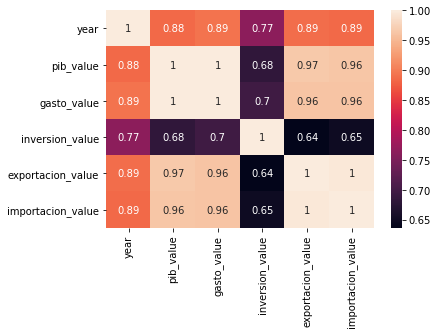

In [40]:
sns.heatmap(df.corr(),annot=True)

Como podemos apreciar la relación que existe entre el gasto y el PIB es de 1, eso quiere decir que si el PIB baja, el gasto también, de la misma manera podemos notar la relación de la exportación e importación con respecto al PIB. Con estas relaciones tomadas en cuenta, procedemos a obtener nuestros features y target. En este caso no tomaremos en cuenta el gasto, debido a que existe una relación muy fuerte y sufririamos overfitting a causa de dicha variable, por lo que usaremos las variables del año, importación y exportación para este nuevo modelo

In [41]:
features = df[['year','exportacion_value','importacion_value']]
target = df['pib_value']

Vamos a crear un modelo polinomial utilizando el modelo polinomial de sklearn debido a que este nos permite una análisis de multivariables, con esto en cuenta procedemos a realizar la creación del modelo.

In [42]:
model_extra = Pipeline([('poly', PolynomialFeatures(degree=3)),
('linear', LinearRegression(fit_intercept=True))])
model_extra = model_extra.fit(features,target)
print("Score extra model = {}".format(model_extra.score(features,target)))
print("MSE = {}".format(mean_squared_error(target,model_extra.predict(features))/10000000000000000000))

Score extra model = 0.987657298397219
MSE = 1.2971508997266836


In [43]:
predict_extra = pd.DataFrame({'year':df['year'].values.reshape(-1),'real':target.values,'predict':model_extra.predict(features)})
alt.Chart(predict_extra.melt('year')).mark_line().encode(
    x='year',
    y='value',
    color='variable'
).properties(title='Prediction vs Real')

alt.Chart(...)

Como podemos apreciar en los resultados, el valor de MSE baja drasticamente, así como su score también sube. Asi mismo podemos darnos cuenta que las prédicciones con respecto a los valores reales del PIB, tienden a ajustarse mucho mejor que en los modelos anteriores. Con esto en cuenta procederemos a hacer una predicción para el año **2020**. Para realizar esta predicción tomamos en cuenta los valores de exportación e importación obtenidos por <a href='https://datosmacro.expansion.com/comercio/importaciones/ecuador'>datosmacro</a>.

In [44]:
lista = np.array([2020,20226245000.00,17959092000.00]).reshape(1,-1)
pd.DataFrame({'year':'2020','value_pib':model_extra.predict(lista)},index=[0])

,year,value_pib
0,2020,"98,706,498,476.54"


Con esta predicción podemos notar que el valor del PIB en el año 2020 sera de <strong>98,70</strong> millones de dolares. Una predicción es casi similar al verdadero valor del PIB del Ecuador en el año 2020 el cual es de <strong>98,80</strong> millones de dolares. Lo cual afirma nuestra hipótesis de que se necesitan más características para mejorar la predicción del **PIB**.

----------------------------------

<h2 style="color:yellowgreen">Conclusiones</h2>

Como hemos visto a lo largo de este informe, hemos notado que el modelo de regresión es una buena opción para predecir valores cambiantes en el tiempo, sin embargo, también notamos que dependiendo de lo que vayamos a predecir, deberemos tomar en cuenta varias características para lograr una mejor predicción ya que caso contrario podriamos dar malos resultados y empeorar una situación cuando se lo realice en un mundo empresarial. El PIB es un valor complejo de calcular y por lo tanto de predecir, y dicho valor dependera de varios factores como lo hemos visto, sin embargo, es necesario la ayuda de un experto con el fin de saber el comportamiento del PIB en el país y como se comportan sus características en el mundo.

----------------------

<h2 style="color:yellowgreen">Recursos</h2>

* **banco mundial:** https://datos.bancomundial.org/
* **datosmacro:**  https://datosmacro.expansion.com/comercio/importaciones/ecuador